In [220]:
import numpy as np
import pandas as pd
from scipy.fft import fft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical

In [221]:
file_path = 'test_5.csv'
df = pd.read_csv(file_path)

In [222]:
data = df[['TCP_Window_Size','Pck_Size','PortTyp_Dst','Payload_Len','Entropy',
          'TCP_Window_Size.1','Pck_Size.1','PortTyp_Dst.1','Payload_Len.1','Entropy.1',
          'TCP_Window_Size.2','Pck_Size.2','PortTyp_Dst.2','Payload_Len.2','Entropy.2',
          'TCP_Window_Size.3','Pck_Size.3','PortTyp_Dst.3','Payload_Len.3','Entropy.3',
          'TCP_Window_Size.4','Pck_Size.4','PortTyp_Dst.4','Payload_Len.4','Entropy.4','Label']]

In [223]:
numeric_columns = ['TCP_Window_Size','PortTyp_Dst','Pck_Size','Payload_Len','Entropy']

In [224]:
def apply_fft(df,columns):
    fft_features = pd.DataFrame()
    for col in columns:
        fft_values = np.abs(fft(df[col].values))
        fft_features[col + '_fft'] = fft_values[:len(fft_values)]
    return fft_features

In [225]:
fft_data = apply_fft(df,numeric_columns)
fft_data.dtypes

TCP_Window_Size_fft    float64
PortTyp_Dst_fft        float64
Pck_Size_fft           float64
Payload_Len_fft        float64
Entropy_fft            float64
dtype: object

In [226]:
data = pd.concat([fft_data,data],axis = 1)
data

,TCP_Window_Size_fft,PortTyp_Dst_fft,Pck_Size_fft,Payload_Len_fft,Entropy_fft,TCP_Window_Size,Pck_Size,PortTyp_Dst,Payload_Len,Entropy,...,Pck_Size.3,PortTyp_Dst.3,Payload_Len.3,Entropy.3,TCP_Window_Size.4,Pck_Size.4,PortTyp_Dst.4,Payload_Len.4,Entropy.4,Label
0,2.860841e+07,38648.000000,2.231852e+06,1.563960e+06,32746.466220,1624,384,2,344,4.904435,...,40,2,0,0.000000,1624,155,2,115,4.767859,Espressi_1a:2c:e7
1,3.091819e+05,22.600991,1.141283e+05,1.153302e+05,1725.148786,2144,48,2,0,0.000000,...,48,2,0,0.000000,2144,48,2,0,0.000000,Espressi_1a:2c:e7
2,3.512208e+05,145.676942,1.036266e+05,1.040475e+05,2155.076529,1624,40,3,0,0.000000,...,48,3,0,0.000000,2000,40,2,0,0.000000,Espressi_1a:2c:e7
3,3.681976e+05,120.032195,1.414370e+05,1.420414e+05,2959.989799,1624,384,3,344,4.897083,...,40,3,0,0.000000,1639,40,3,0,0.000000,Espressi_1a:2c:e7
4,7.182207e+04,100.400870,1.479699e+04,1.458343e+04,208.058864,1624,155,3,115,4.767859,...,155,2,115,4.767859,1624,155,2,115,4.767859,Espressi_1a:2c:e7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,3.102391e+05,57.008727,8.048115e+04,8.110793e+04,1542.368890,1632,377,2,337,4.927477,...,48,3,0,0.000000,2144,48,3,0,0.000000,Espressi_ff:40:a9
15996,7.182207e+04,100.400870,1.479699e+04,1.458343e+04,208.058864,2144,48,3,0,0.000000,...,40,3,0,0.000000,1632,377,3,337,4.924203,Espressi_ff:40:a9
15997,3.681976e+05,120.032195,1.414370e+05,1.420414e+05,2959.989799,2144,48,3,0,0.000000,...,124,2,84,4.619888,1631,40,3,0,0.000000,Espressi_ff:40:a9
15998,3.512208e+05,145.676942,1.036266e+05,1.040475e+05,2155.076529,2144,48,2,0,0.000000,...,124,2,84,4.619888,1632,377,2,337,4.909797,Espressi_ff:40:a9


In [227]:
data.columns

Index(['TCP_Window_Size_fft', 'PortTyp_Dst_fft', 'Pck_Size_fft',
       'Payload_Len_fft', 'Entropy_fft', 'TCP_Window_Size', 'Pck_Size',
       'PortTyp_Dst', 'Payload_Len', 'Entropy', 'TCP_Window_Size.1',
       'Pck_Size.1', 'PortTyp_Dst.1', 'Payload_Len.1', 'Entropy.1',
       'TCP_Window_Size.2', 'Pck_Size.2', 'PortTyp_Dst.2', 'Payload_Len.2',
       'Entropy.2', 'TCP_Window_Size.3', 'Pck_Size.3', 'PortTyp_Dst.3',
       'Payload_Len.3', 'Entropy.3', 'TCP_Window_Size.4', 'Pck_Size.4',
       'PortTyp_Dst.4', 'Payload_Len.4', 'Entropy.4', 'Label'],
      dtype='object')

In [240]:
x = data.drop(columns = ['Label'])
y = data['Label']

In [229]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # converting labels into integers for classification
y = to_categorical(y) # one-hot encoding for multi-class classification

In [230]:
scaler = StandardScaler()
x = scaler.fit_transform(x) #scaling the features for better performance
x = x.reshape(x.shape[0],x.shape[1],1)

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [232]:
model = Sequential([
    # First Convolutional Block
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),
    BatchNormalization(),  # Normalizes activations to stabilize and speed up training
    MaxPooling1D(pool_size=2),
    Dropout(0.3),  # Prevent overfitting

    # Second Convolutional Block
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    # Third Convolutional Block
    Conv1D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),  # Increased neurons for better feature learning
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    # Output Layer
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\Khush Bhuta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)                   │ (None, 28, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 28, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 12, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 12, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 4, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 4, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 2, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 2, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 64)                  │              

 Total params: 200,520 (783.28 KB)

 Trainable params: 199,240 (778.28 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [233]:
history = model.fit(x_train,y_train,epochs = 50, batch_size = 32, validation_data = (x_test,y_test))
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1382 - loss: 2.7726 - val_accuracy: 0.1467 - val_loss: 2.1042
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1527 - loss: 2.2197 - val_accuracy: 0.1688 - val_loss: 2.0473
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1731 - loss: 2.0741 - val_accuracy: 0.1760 - val_loss: 2.0211
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1741 - loss: 2.0323 - val_accuracy: 0.1892 - val_loss: 1.9850
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1893 - loss: 1.9927 - val_accuracy: 0.1896 - val_loss: 1.9687
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2035 - loss: 1.9545 - val_accuracy: 0.1983 - val_loss: 1.9552
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2028 - loss: 1.9548 - val_accuracy: 0.1873 - val_loss: 1.9657
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2049 - loss: 1.9332 - val_accur

In [234]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_cnn = model.predict(x_test).argmax(axis = 1)
if y_test.ndim == 2 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


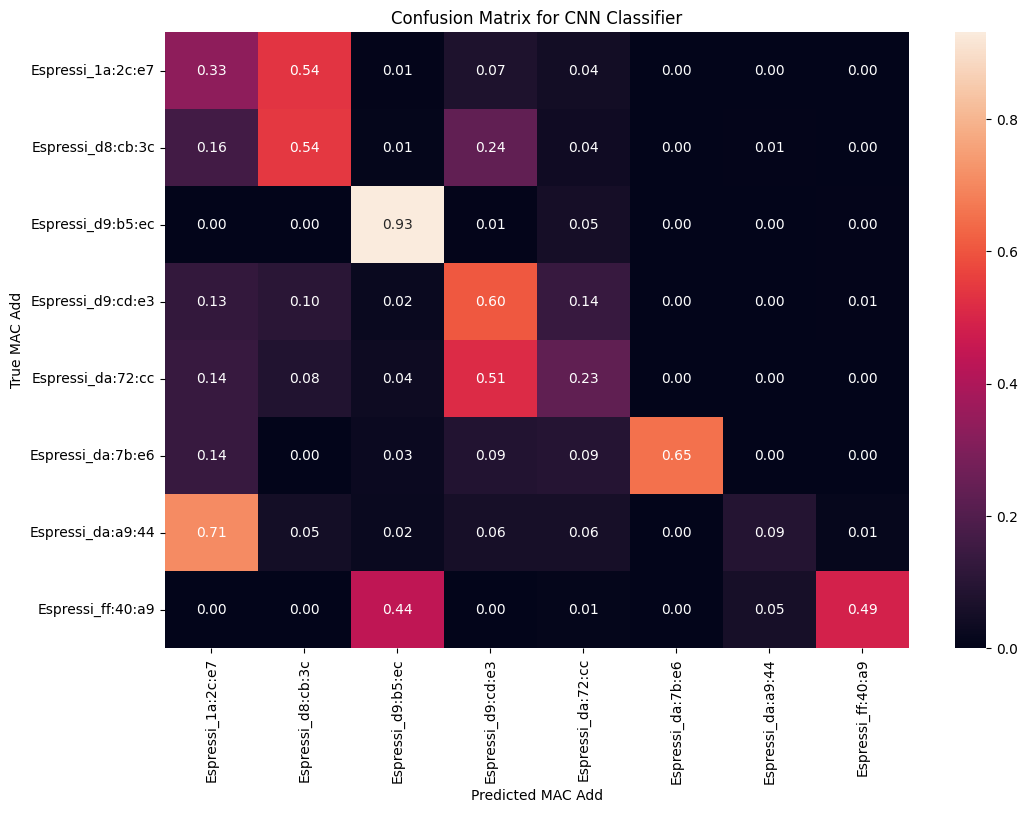

In [235]:
cnf_matrix_cnn = metrics.confusion_matrix(y_test,y_pred_cnn)
normalized_cnf_matrix_cnn = cnf_matrix_cnn.astype('float')/cnf_matrix_cnn.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(12,8))
sns.heatmap(normalized_cnf_matrix_cnn,annot = True, fmt = '.2f',
           xticklabels = label_encoder.classes_,
           yticklabels = label_encoder.classes_)
plt.xlabel('Predicted MAC Add')
plt.ylabel('True MAC Add')
plt.title(f'Confusion Matrix for CNN Classifier')
plt.show()

In [236]:
accuracy = metrics.accuracy_score(y_test,y_pred_cnn)
precision = metrics.precision_score(y_test, y_pred_cnn, average = 'macro')
recall = metrics.recall_score(y_test, y_pred_cnn, average = 'macro')
f1_score = metrics.f1_score(y_test,y_pred_cnn,average='macro')

In [237]:
# The performance of the CNN classifier is worse than a random-classifier

In [238]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1_Score: {f1_score:.4f}')

Accuracy: 0.4865
Precision: 0.5630
Recall: 0.4848
F1_Score: 0.4769
